# **Supervised Learning Models on Import-Export Dataset using Python**





# **PROJECT CONTENTS:**
1.Project Information

2.Description of Data

3.Data Sampling

4.Project Objectives | Problem Statements

5.Analysis of Data

6.Observations | Findings

7.Managerial Insights | Recommendations


# 1. **Project Information**
Title: Data Exploration with Python using Pandas & Numpy Libraries

Student: Ankit Sharma (055059)








# 2. **Description of Data**
Data Source: https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000

A live link is used in the dataset

*   **Data Columns Description:**

**Transaction_ID**: Unique identifier for each trade transaction.

**Country**: Country of origin or destination for the trade.

**Product**: Product being traded.

**Import_Export**: Indicates whether the transaction is an import or export.

**Quantity**: Amount of the product traded.

**Value**: Monetary value of the product in USD.

**Date**: Date of the transaction.

**Category**: Category of the product (e.g., Electronics, Clothing, Machinery).

**Port**: Port of entry or departure.

**Customs_Code**: Customs or HS code for product classification.

**Weight**: Weight of the product in kilograms.

**Shipping_Method**: Method used for shipping (e.g., Air, Sea, Land).

**Supplier**: Name of the supplier or manufacturer.

**Customer**: Name of the customer or recipient.

**Invoice_Number**: Unique invoice number for the transaction.

**Payment_Terms**: Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).

**Data Type**: Since the dataset contains multiple entities (countries) and records data over time, this is an example of Panel Data (also called longitudinal data).


**Data Variables:**

All non-null Variables

Numbers:

**Integer Variables**: 3 (Quantity, Customs_Code, Invoice_Number)

**Float (Decimal) Variables:** 2 (Value, Weight)

**Text:** 9 (Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms)

**DateTime**: 1 (Date)







# **3. Data Sampling**
From the dataset containing 15,000 values, a sample of 5001 entries was taken. The dataset sample (now referred to as as59_sample) was taken into account for further exploration.

**Data Variables**:

1.**Index Variables**: 'Transaction_ID', 'Invoice_Number'

2.**Categorical Variables:**

Nominal Variables: Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customs_Code, Customer

Ordinal Variable: Payment_Terms

**Non-Categorical Variables**: Quantity, Value, and Weight

# **4. Project Objectives**
1.Classification of Dataset into {Segments | Clusters | Classes} using Supervised Learning Classification Algorithms

2.Identification of {Important | Contributing | Significant} Variables or Features and their Thresholds for Classification

3.Determination of an appropriate Classification Model based on Performance Metrics


# **5. Exploratory Data Analysis**
**5.1. Data Preprocessing:**

1.The data has no missing values, hence no missing data treatment was performed.

2.For Encoding, **Ordinal Encoder** was used.

3.For Scaling, **Min-Max Scaler** was used.

**5.2. Descriptive Statistics**
**Non-Categorical Variables:**

a.Measures of Central Tendency: Minimum, Maximum, Mean, Median, Mode, Percentile

b.Measures of Dispersion: Range, Standard Deviation, Skewness, Kurtosis, Correlation (Matrix)

c.Composite Measure: Coefficient of Variation, Confidence Interval

**Categorical Variables:**

a.Count, Frequency, Proportion, Minimum, Maximum, Mode, Rank

**5.3. Data Visualization**
Various subplots were used such as Bar, Heatmaps, Histograms, and Correlation Matrices.

**5.4. Inferential Statistics**
a.**Categorical Variable** (Nominal | Ordinal):

Test of Homogeneity (Chi-sq)

b. **Non-Categorical Variable:**

Test of Normality (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera)

Test of Correlation (t)

**5.5. Machine Learning Models**
**Logistic Regression (LR)**: Logistic regression is a classification algorithm that models the probability of a binary outcome based on one or more predictor variables using a logistic function.

**Support Vector Machines (SVM)**: SVM finds a hyperplane that best separates the data into classes by maximizing the margin between the closest points of the classes (support vectors).

**Stochastic Gradient Descent (SGD)**: An iterative optimization algorithm used for minimizing loss functions in linear classifiers and regressors, particularly useful for large datasets.

**Decision Trees:** A tree-based algorithm where each internal node represents a decision on a feature, each leaf node represents an outcome, and paths from root to leaf represent classification rules.

**K-Nearest Neighbors (KNN):** A lazy learning algorithm that classifies a data point based on the majority class of its k-nearest neighbors in the feature space.

**Naive Bayes (NB)**: A probabilistic classifier based on Bayes' theorem, assuming strong independence between features.

**Bagging (Bootstrap Aggregating)**: Combines predictions from multiple models (e.g., Random Forest) to reduce variance and improve accuracy.

**Boosting**: Combines weak learners sequentially to form a strong learner by minimizing errors iteratively (e.g., Extreme Gradient Boosting - XGBoost).

**5.6. Model Performance Metrics**
**Confusion Matrix:**

1.Sensitivity (Recall): True Positive Rate

2.Specificity: True Negative Rate

3.Accuracy: Overall correctness

4.Precision: Positive Predictive Value

5.F1-Score: Harmonic mean of Precision and Recall

6.AUC: Area Under the ROC Curve

**K-Fold Cross-Validation**: Splits data into k subsets; trains on k-1 and tests on the remaining one iteratively to ensure robust performance evaluation.

**Model Run Statistics**:

1.Time Taken

2.Memory Used

3.Inherent Complexity

** Necessary Library to carry out the Analysis**

In [ ]:
# Import Relevant Python Libraries

from io import StringIO
import requests
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, kstest, anderson, jarque_bera
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, Birch
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer, KNNImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score,davies_bouldin_score  # For Clustering Model Evaluation
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as stats
import statsmodels.stats.multicomp as multi
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



warnings.filterwarnings('ignore')

**CONCLUSION AND MANAGERIAL RECOMMENDATIONS:**

**Coefficient of Variation Analysis**

The Coefficient of Variation (CV) is a measure of relative variability, representing the ratio of the standard deviation to the mean, expressed as a percentage. In this case, the CV values for Quantity (57.44%), Value (57.71%), and Weight (58.44%) are all quite high and closely aligned.

**Key Observations**:

**High Variability**:

The CV values exceeding 50% indicate substantial variability in the data for all three metrics: quantity, value, and weight. This suggests significant fluctuations in the dataset, such as uneven distributions or notable differences across periods, regions, or categories.
Similarity Across Metrics:

The CV percentages for quantity, value, and weight are very close, implying that the variability in these attributes is interrelated. This may suggest a proportional relationship between the three metrics.

**Managerial Recommendations:**

**Investigate Drivers of Variability:**

Perform deeper segmentation of the data (e.g., by product type, region, or time period) to identify the primary sources of variability. Focus on understanding what causes these fluctuations, such as market demand, supplier inconsistency, or logistical challenges.

**Stabilize Operations:**

Consider strategies to minimize variability, such as improving demand forecasting, optimizing supply chain processes, or implementing better inventory management.

**Correlate Metrics**:

Since quantity, value, and weight have similar CVs, investigate how they influence each other. For instance, if high-value products consistently weigh less, or low-quantity shipments contribute to higher value variability, targeted interventions can reduce overall fluctuation.

**Develop Risk Mitigation Strategies**:

High variability often translates to higher operational risks. Consider implementing hedging strategies, diversifying suppliers, or negotiating flexible contracts to mitigate the impact of volatility.

**Conclusion:**

 **Confidence Interval Analysis for Import-Export Data**

The 95% Confidence Intervals for Quantity, Value, and Weight are quite narrow, with all ranges centered around 0.49 to 0.51. This provides critical insights into the consistency and reliability of the data.

**Key Observations**:

**Narrow Confidence Intervals**:

The tight ranges indicate low uncertainty and high precision in the estimates for all three metrics (quantity, value, and weight). This suggests that the sample **data** provides a stable and reliable representation of the population.
Consistency Across Metrics:

The similarity in confidence intervals for quantity, value, and weight highlights a uniform pattern in the dataset. This could point to a proportional relationship between these variables in the import-export transactions.
Balanced Data Distribution:

The close range of the confidence intervals suggests that the data points are evenly distributed without significant outliers or extreme deviations impacting the results.

**Managerial Recommendations:**

**Leverage Data Reliability:**

The precision of the estimates allows for confident decision-making. Use this reliable data to make strategic plans, such as forecasting import-export trends, setting benchmarks, or negotiating contracts.

**Monitor for Changes Over Time**:

While the current intervals suggest stability, regular monitoring of these metrics will ensure that new trends, anomalies, or shifts in patterns are detected early.

**Utilize the Relationships:**

Explore how the uniformity between quantity, value, and weight can be leveraged.
 For example:
If weight and value show proportional growth, pricing strategies can be optimized for high-weight categories.
Balanced quantities can help with supply chain planning and resource allocation.
Confirm Statistical Validity:

While the confidence intervals suggest reliability, ensure that data collection methods and statistical assumptions (e.g., normality) are validated. This helps maintain the integrity of the analysis and prevents overconfidence in the data.

Conclusion:
Correlation Matrix Analysis for Import-Export Data

The correlation matrix provides insights into the relationships between Quantity, Value, and Weight.
 Here’s what the results indicate:

**Key Observations**:

1.**Quantity vs. Value (-0.0168):**

The correlation is very close to zero, suggesting no meaningful linear relationship between the quantity of goods and their value. This implies that changes in quantity do not predict changes in value.

2.**Quantity vs. Weight (-0.0161):**

Similarly, this near-zero correlation indicates no significant linear relationship between quantity and weight. The weight of goods does not depend on the number of items being transacted.

3.**Value vs. Weight (0.0256):**

This slightly positive correlation is also negligible, indicating that the monetary value of goods is largely independent of their weight.

4.**Diagonal Values (1.000)**:

These indicate perfect self-correlation, which is expected, as each variable is perfectly correlated with itself.

**Managerial Recommendations:**

1.**Segment Data for Better Insights:**

The near-zero correlations suggest that the aggregate dataset might be too generalized. Segment the data (e.g., by product category, region, or time period) to uncover more specific and meaningful relationships that could guide business decisions.

2.**Independent Strategies for Quantity, Value, and Weight:**

Since these metrics are largely independent, separate strategies should be developed for each:
Quantity: Focus on improving supply chain efficiency and managing order volumes.

Value: Optimize pricing strategies and explore high-margin products to maximize revenue.

Weight: Streamline logistics and transportation to reduce costs for heavier shipments.

4.**Explore Non-Linear Relationships:**

While linear correlations are negligible, there could be non-linear patterns or other influencing variables. Use advanced statistical methods (e.g., regression or clustering) to uncover hidden relationships.

5.**Improve Data Collection and Analysis **:

The low correlations might result from limitations in the dataset (e.g., missing variables or inconsistent data). Ensure data collection processes are robust, and include additional metrics (e.g., product type, shipping distance) to enhance analysis.

6.**Focus on Independent Optimization:**

Since quantity, value, and weight operate independently, optimize each process without expecting trade-offs or synergies. For example, focus on lightweight, high-value goods for cost-efficient revenue growth.

**Conclusion: Box Plot Analysis of Quantity, Value, and Weight**

The box plots provide a visual summary of the distribution of Quantity, Value, and Weight in the import-export dataset.
 Here's a detailed conclusion:

**Uniform Distribution**:

The distributions for Quantity, Value, and Weight are relatively symmetric, as evidenced by the central placement of the median within the boxes.

There are no significant outliers, suggesting that the dataset does not contain extreme deviations for these variables.

**Range and Variability**:

All three variables (Quantity, Value, Weight) exhibit similar interquartile ranges (IQR), indicating comparable variability within their distributions.
The range (from minimum to maximum values) is also similar, suggesting that the data points are spread out across similar scales for each variable.

**Central Tendency:**

The medians for all three variables are approximately at the 0.5 mark, indicating balanced distributions.
This balance could reflect a consistent relationship between the quantity of goods, their value, and their weight, at least within the observed data.

**No Outliers:**

The absence of extreme values in the whiskers implies a well-managed dataset, likely free from errors or extraordinary trade events.

**Managerial Recommendations:**

**Optimize Resource Allocation:**

Given the balanced distribution, ensure equal focus across Quantity, Value, and Weight metrics when planning inventory, logistics, and financial resources.

**Improve Cost Efficiency in Logistics:**

With similar ranges for Quantity and Weight, focus on optimizing transportation methods to maximize weight efficiency without compromising product quantities.

**Leverage Consistency**:

The absence of outliers indicates stable trade operations. Use this consistency to negotiate better contracts with suppliers, customers, and logistics partners based on predictable patterns.

**Identify Areas for Growth:**

While the data shows stability, explore opportunities to increase the range of high-value products to enhance profitability without necessarily increasing weight or quantity.

**Monitor Trends Regularly:**

Though the data shows balance, continuous monitoring is essential to detect any future deviations that could indicate operational inefficiencies or market changes.

**Encourage Product Diversification:**

Ensure balanced diversification across product categories to maintain stable trade volumes while exploring new opportunities in underrepresented segments.

**Insights from the violin Plot:**

**Distribution Shape**:

Each category shows a relatively symmetric distribution around the mean or median.
The widths of the violin plots suggest the density of values. All categories have similar density patterns, indicating consistency in the spread of quantity.

**Spread of Data:**

The range of the quantity is uniform across all categories. All categories have a similar range (from ~0.0 to ~1.0).

**Central Tendency:**

The black bars in the center of the violin plots represent the interquartile range (IQR), with the white dot showing the median.

The medians across categories appear consistent, suggesting no significant outliers or skewed data within individual categories.

**Homogeneity**:

The similar shape and range across categories indicate that the quantity is distributed consistently across them.

**Managerial Recommendations:**

**Operational Consistency:**

Given the uniformity in quantity distribution, operations related to each category can be standardized. This is beneficial for resource allocation, logistics, and process optimization in import/export activities.

**Focus on Quality and Efficiency:**

Since the data does not show variability across categories, the managerial focus should shift to ensuring quality and efficiency rather than addressing category-specific challenges.

**Review Category Definitions:**

The similarity across categories might suggest that the categorization criteria are broad or overlapping. Managers should re-evaluate the category definitions to ensure they capture meaningful distinctions.

**Monitor Trends Over Time**:

While the current data shows homogeneity, it is essential to monitor trends over time. Any deviation from this uniform pattern could signal operational issues or external market changes.

**Resource Planning**:

Uniform distributions allow for predictable resource needs. Managers can use this insight to allocate manpower, storage, and transportation resources evenly across categories.

**Further Statistical Analysis:**

Perform a chi-square test (as indicated in the code snippet) to statistically confirm whether there are significant differences between categories. This will provide additional confidence in the observed patterns.

**Explore External Factors:**

Investigate external influences like trade regulations, seasonal demand, or geopolitical factors that might impact certain categories. This will help identify risks and opportunities in the import/export operations.

**Conclusion and Managerial Recommendations**

1.**Chi-square Statistic:**

The Chi-square statistic of 1.761 measures the difference between observed and expected frequencies. A low value indicates that the observed data closely matches what is expected under the null hypothesis of independence. In this case, the statistic confirms there is minimal divergence between the two variables being analyzed.

**Conclusion:** The low Chi-square value supports the idea that there is no strong relationship between the two variables.

**Recommendation:** Focus efforts on other relationships or variables, as these two variables do not exhibit significant interaction.

2.**P-value:**

The p-value of 0.7796 represents the likelihood of observing the current data, assuming the null hypothesis of independence is true. Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This implies no significant association exists between the two variables.

**Conclusion:** The lack of statistical significance means the variables are independent. Their behavior does not influence one another.

**Recommendation:** Treat the two variables as separate entities in operational planning. Optimize decisions for each variable without concern for their interaction.

3.**Degrees of Freedom (df):**
The degrees of freedom (df) of 4 result from the number of categories in each variable minus constraints. It reflects the complexity of the test. A higher df allows for a more robust statistical test.

**Conclusion:** The degrees of freedom confirm that the test was conducted properly based on the dataset’s categorization.

**Recommendation:** Ensure proper and meaningful categorization of variables in future analyses to allow for valid statistical testing.

4.**Observed Frequencies:**
These are the actual data counts for each category of the variables. The observed frequencies closely align with the expected frequencies derived from the null hypothesis.

**Conclusion**: The similarity between observed and expected frequencies reinforces the independence of the two variables.

**Recommendation:** Maintain current operational strategies, as the distribution appears stable and random.

5.**Expected Frequencies:**
Expected frequencies are calculated under the assumption that the two variables are independent. The close match with observed frequencies supports the null hypothesis.

**Conclusion:** The expected frequencies validate the randomness and lack of association between the variables.

**Recommendation:** Use these expected frequencies as a baseline to monitor for deviations in future data. Significant changes could indicate evolving relationships or issues that need attention.

**Overall Conclusion**:

The analysis, including the Chi-square statistic (1.761), p-value (0.7796), and degrees of freedom (4), confirms that the two variables are independent. The alignment between observed and expected frequencies shows no significant association, meaning their distributions are unrelated and random.

**Managerial Recommendations:**

1.**Independent Decision-Making:**
Since the variables are independent, management can optimize each variable without needing to account for interactions. For example, decisions on shipping methods or product categories can be made separately.

2.**Monitor for Changes Over Time:**
While the current data shows no association, periodic analyses should be conducted to check for any emerging patterns or relationships due to market or operational shifts.

3.**Focus on Other Variable Pairs:**
Investigate other relationships in the dataset for meaningful insights, as this pair of variables does not provide actionable interdependencies.

4.**Refine Data Categorization:**
Reassess and refine the categorization of the variables to ensure meaningful groupings. This could help uncover relationships that might currently be obscured.

5.**Diversify Strategies:**
The independence of these variables provides flexibility for management to experiment with different strategies (e.g., exploring new regions, ports, or shipping methods) without concern for mutual effects.

**Detailed Conclusion Based on Results:**

Normality Tests for Quantity, Value, and Weight

The normality of Quantity, Value, and Weight was tested using multiple statistical methods. Here are the key findings:

**Shapiro-Wilk Test:**

For Quantity: Statistic = 0.9581, p-value =
1.08
×
1
0
−
35



For Value: Statistic = 0.9561, p-value =
2.29
×
1
0
−
36


For Weight: Statistic = 0.9533, p-value =
2.84
×
1
0
−
37

**Conclusion:**
 For all three variables, the p-values are significantly below 0.05, indicating strong evidence to reject the null hypothesis of normality. None of the variables follow a normal distribution.

**Kolmogorov-Smirnov Test**:

For Quantity: Statistic = 0.5, p-value = 0.0

For Value: Statistic = 0.5001, p-value = 0.0

For Weight: Statistic = 0.5, p-value = 0.0

**Conclusion**:
The Kolmogorov-Smirnov test further confirms that none of the variables follow a normal distribution.

**Anderson-Darling Test:**

For Quantity: Statistic = 49.89, Critical Values = [0.576, 0.655, 0.786, 0.917, 1.091]

For Value: Statistic = 52.10, Critical Values = [0.576, 0.655, 0.786, 0.917, 1.091]

For Weight: Statistic = 58.14, Critical Values = [0.576, 0.655, 0.786, 0.917, 1.091]

**Conclusion:**
The Anderson-Darling statistic exceeds all critical values at different significance levels, reinforcing the non-normality of all three variables.

**Jarque-Bera Test:**

For Quantity: Statistic = 284.17, p-value =
1.96
×
1
0
−
62


For Value: Statistic = 290.41, p-value =
8.68
×
1
0
−
64

For Weight: Statistic = 306.21, p-value =
3.21
×
1
0
−
67


**Conclusion:** The extremely low p-values (< 0.05) confirm the non-normality of Quantity, Value, and Weight.

**T-Test Correlation Results:**

Quantity and Value:

T-statistic = -0.375, p-value = 0.7077

**Conclusion**: The p-value is greater than 0.05, indicating no significant correlation between Quantity and Value.

Quantity and Weight:

T-statistic = 0.116, p-value = 0.9079

**Conclusion:** The p-value is greater than 0.05, showing no significant correlation between Quantity and Weight.

Value and Weight:

T-statistic = 0.487, p-value = 0.6261

**Conclusion**: The p-value is greater than 0.05, indicating no significant correlation between Value and Weight.

**Final Conclusion:**
The data for Quantity, Value, and Weight does not follow a normal distribution, as supported by multiple normality tests (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera).

No significant correlation exists between Quantity, Value, and Weight, as evidenced by T-tests. These variables operate independently and do not significantly influence one another.

**Managerial Implications**:
1.**Non-Normal Data:**

Since the data for Quantity, Value, and Weight is non-normal, management should avoid parametric methods like linear regression or Pearson correlation when analyzing these variables. Instead, use non-parametric methods such as Spearman correlation or Mann-Whitney U tests for reliable insights.

2.**Independent Decision-Making:**

The lack of correlation between Quantity, Value, and Weight allows for independent decision-making. Management can optimize strategies for Quantity (e.g., volume-based discounts), Value (e.g., pricing strategies), and Weight (e.g., freight optimization) separately.

3.**Alternative Data Transformations:**

Consider transforming the data (e.g., logarithmic or square root transformation) to achieve normality, which could open up the use of parametric methods for advanced statistical analyses.

4.**Focus on Other Relationships:**

Since no significant correlation exists among these variables, focus on identifying relationships between other attributes (e.g., Port, Shipping Method, Supplier) to uncover actionable insights.

5.**Operational Efficiency:**

Given the independence of Quantity, Value, and Weight, tailor strategies for improving efficiency in each area.
For example:

Optimize shipment processes based on Weight.
Improve pricing and profitability by focusing on Value without being constrained by Quantity.

6.**Periodic Analysis:**

Reassess these variables periodically to detect any emerging trends or relationships that may develop over time due to changes in market conditions or business operations.

**Detailed Conclusion Based on the Decision Tree Classifier:**

**Overall Accuracy:**

The decision tree classifier has an overall accuracy of 31.45%, which is significantly low. This indicates that the model struggles to predict the correct class labels effectively. In a typical classification task, an accuracy close to random chance (e.g., for 3 classes, 33.3%) suggests the model does not capture meaningful patterns in the data.

**Precision:**

**Class 0.0:** Precision is **0.30,** meaning only 30% of predictions for this class are correct.

**Class 1.0:** Precision is **0.33**, indicating slightly better performance for this class.

**Class 2.0**: Precision is **0.31,** which is also poor.

**Conclusion**:
The model lacks precision across all classes, suggesting it is not effective at identifying true positives and is prone to misclassification.

**Recall:**

**Class 0.0**: Recall is **0.29**, meaning only 29% of the actual instances of Class 0.0 are correctly predicted.

**Class 1.0**: Recall is **0.36**, indicating that 36% of actual instances are correctly identified.

**Class 2.0**: Recall is **0.30**, showing poor performance in identifying actual occurrences.

**Conclusion**:
The low recall values indicate the model struggles to correctly identify instances from all three classes.

**F1-Score:**

**Class 0.0:** F1-score is **0.30,** which represents the harmonic mean of precision and recall.

**Class 1.0**: F1-score is** 0.34,** the best among the classes but still below acceptable levels.

**Class 2.0**: F1-score is **0.31**, reflecting poor balance between precision and recall.

**Conclusion**:
The F1-scores suggest that the model has limited effectiveness in classification and consistently underperforms across all classes.

**Class Distribution and Weighted Metrics:**

The weighted average metrics (precision, recall, F1-score) are all around 31%, reflecting the model's inability to provide reliable predictions. This is likely due to poor feature representation, insufficient training data, or the model's inability to capture the complexity of the relationships in the dataset.

**Managerial Implications:**

1.**Model Performance Concerns:**

The decision tree classifier has poor accuracy, precision, recall, and F1-scores, indicating that it is not suitable for deployment in its current state. Managers should avoid relying on this model for decision-making tasks, as it may lead to erroneous predictions.

2.**Root Cause Analysis:**

Conduct a thorough analysis of the dataset and model design to identify potential issues:
Feature Engineering: Ensure relevant and meaningful features are included. Evaluate whether additional features (e.g., categorical variables or external data) could enhance prediction quality.

3.**Class Imbalance:** If the dataset has imbalanced class distributions, apply techniques such as oversampling, undersampling, or using synthetic data (e.g., SMOTE).

Data Quality: Check for missing, noisy, or irrelevant data that could hinder the model's learning.

4.**Model Improvement:**

Hyperparameter Tuning: Experiment with different hyperparameters (e.g., tree depth, splitting criteria) to optimize the decision tree's performance.

Algorithm Selection: Consider using more robust algorithms such as Random Forests, Gradient Boosting (e.g., XGBoost, LightGBM), or Neural Networks, which may capture complex relationships better.

Cross-Validation: Implement cross-validation to assess model performance and ensure it generalizes well across unseen data.

5.**Alternative Strategies:**

If the problem remains difficult to model, explore non-machine learning approaches such as rule-based systems or domain-expert heuristics for decision-making.

6.**Training and Collaboration:**

Collaborate with data scientists to explore advanced techniques, such as feature importance analysis and dimensionality reduction (e.g., PCA). This will help in identifying the key factors influencing the model and making data-driven improvements.

7.**Business Risk:**

Deploying an underperforming model can lead to incorrect predictions, resulting in financial losses or operational inefficiencies. Managers should allocate resources for improving the model before integrating it into critical decision-making processes.

8.**Ongoing Model Evaluation:**

Establish a system for continuous evaluation and improvement of the model. Periodic updates with new data can help capture evolving trends and improve accuracy over time.

**Conclusion from the Confusion Maxtrix:**

**Prediction Accuracy:**

The confusion matrix reveals a low level of predictive accuracy across all three classes (0.0, 1.0, 2.0). Most predictions are distributed across the off-diagonal elements, indicating frequent misclassifications.

**Class-Wise Observations:**

**Class 0.0**: Out of 515 actual instances, the model correctly classified only 148, while incorrectly predicting 189 and 178 as Classes 1.0 and 2.0, respectively.

**Class 1.0**: Out of 498 actual instances, only 178 were correctly classified, with 176 and 144 misclassified as Classes 0.0 and 2.0.

**Class 2.0**: Out of 488 actual instances, only 146 were correctly classified, with 162 and 180 misclassified as Classes 0.0 and 1.0.

**Misclassification Rate:**

The diagonal elements (correct classifications) are consistently smaller than the off-diagonal elements (misclassifications), reflecting the model's inability to differentiate between the classes effectively.

**Insight from Confusion Matrix:**

There is significant overlap between the predicted and actual classes, indicating that the features used by the decision tree do not provide sufficient discriminatory power.
The misclassification patterns suggest a lack of clarity in the underlying data distribution or insufficient complexity of the model.

**Managerial Implications:**

1.**Improvement in Model Accuracy:**

The low accuracy and high misclassification rates suggest that the decision tree in its current form is not reliable for decision-making purposes. Managers should not rely on this model for operational or strategic tasks until improvements are made.

2.**Enhancing Data Quality:**

Feature Engineering: Analyze the existing features to determine their relevance and discriminatory power. Introduce new, relevant features that could help distinguish between the classes more effectively.
Data Augmentation: Gather additional data or balance the dataset to reduce noise and improve model training.

3.**Exploration of Advanced Models:**

Replace the decision tree with more advanced models like Random Forest, Gradient Boosting (e.g., XGBoost, LightGBM), or Neural Networks, which might better capture the complexity of the relationships in the data.

4.**Hyperparameter Tuning:**

Fine-tune the hyperparameters of the decision tree (e.g., maximum depth, minimum samples split) to improve performance.

5.**Business Risks:**

Implementing a poorly performing model can lead to incorrect decisions, such as overstocking, understocking, or misallocation of resources. Managers should prioritize improving the model before applying it to real-world scenarios.

6.**Periodic Evaluation:**

Set up a system for continuous evaluation of the model using new data. This will ensure that the model adapts to changing patterns and remains relevant over time.

7.**Collaborative Review:**

Collaborate with data scientists and domain experts to better understand the patterns in the data and refine the model.

**Conclusion for Model Accuracy:**
**Model Performance**:

**The overall accuracy of the model is 34.11%, which is marginally better than random guessing (33.33% for three classes)**. However, it is still too low to be considered reliable for import-export predictions.

The macro average F1-score is 0.33, indicating poor balance between precision and recall across all classes.

**Class-Wise Observations**:

1.**Class 0.0 **(e.g., low performance or specific region/product category): This class achieved the best performance with a precision of 0.36 and recall of 0.48, meaning 48% of actual instances were correctly classified. However, it still has room for improvement.

2.**Class 1.0 **(e.g., medium performance or category): Precision and recall are both at 0.33 and 0.35, indicating a high rate of misclassifications.

3.**Class 2.0** (e.g., high performance or category): This class performed the worst, with a precision of 0.31 and a very low recall of 0.19, showing that the model struggled significantly to identify instances belonging to this class.

**Imbalanced Recall**:

The recall is skewed, particularly for Class 2.0, which might indicate issues such as insufficient representation of key factors or noise in the dataset for this category.

**Insights from Import-Export Context:**

Misclassifications suggest that the features used in the model may not adequately capture the relationships between imports, exports, and influencing factors (e.g., trade regions, product categories, or volumes).

This poor performance could lead to inaccurate predictions of trade flow trends, impacting operational decisions.

**Managerial Implications:**

1.**Revisit Data Quality**:

The dataset might have noise, inconsistencies, or insufficiently representative features. Managers should ensure the data used captures meaningful aspects such as:

Geographical differences in trade flow.

Product-level granularity for imports and exports.

Seasonal or economic factors influencing trade patterns.

2.**Improve Feature Selection**:

Engage analysts to identify additional variables (e.g., tariffs, market demands, logistics costs) that might improve the discriminatory power of the model.

Conduct feature importance analysis to prioritize relevant features.

3.**Balanced Data Representation**:

Address class imbalance if present. Oversample underrepresented categories (e.g., Class 2.0) or undersample dominant ones to improve model sensitivity.

4.**Refine Modeling Approach**:

Move beyond the current model by exploring ensemble techniques like Random Forest, Gradient Boosting (e.g., XGBoost), or Neural Networks, which can better handle complexity and interactions in trade data.

Hyperparameter optimization should also be employed to extract better performance.

5.**Scenario-Based Analysis**:

Instead of relying solely on predictive accuracy, use scenario-based approaches where the model's predictions are supplemented by domain expertise to account for inaccuracies.

6.**Risks of Poor Model Performance**:

Incorrect trade volume predictions can lead to suboptimal inventory management, shipping delays, or overcommitting to contracts.

This could also result in financial losses due to misaligned supply chain decisions.

**Recommendations**:

1.**Immediate Steps**:

Reassess the model using additional preprocessing techniques such as outlier removal, normalization, and feature engineering.

Increase dataset size or representation through data augmentation or incorporation of external trade data.

2.**Enhance Predictive Framework**:

Adopt ensemble models for better accuracy.
Incorporate interpretability methods (e.g., SHAP values) to understand the contribution of each variable in predictions.

3.**Develop Dashboards**:

Design trade dashboards that integrate predictive insights with historical data for real-time decision-making.

4.**Iterative Model Evaluation**:

Continuously test and refine the model with new trade data to ensure adaptability to evolving global trade patterns.

**Conclusion of Regression Analysis**:
**Model Performance**:

The accuracy of the Logistic Regression model is 34.71%, which is marginally better than random guessing for a three-class problem (33.33%). This suggests the model struggles to differentiate between classes effectively.

The macro average F1-score is 0.32, indicating that the model is imbalanced in its performance across classes, with some classes being predicted more accurately than others.

**Class-Wise Observations**:

**Class 0.0**:
Precision: 0.42, Recall: 0.13, and F1-score: 0.19.

The model correctly identifies 42% of the predicted Class 0 instances, but only 13% of the actual Class 0 instances are correctly classified. This indicates high false negatives for this class.

**Class 1.0**:
Precision: 0.33, Recall: 0.59, and F1-score: 0.43.
This class shows the best recall (59%), meaning the model captures a majority of the true Class 1 instances. However, the low precision indicates a high number of false positives.

**Class 2.0**:
Precision: 0.35, Recall: 0.33, and F1-score: 0.34.
The model performs moderately for this class but does not stand out compared to Class 1.

**Macro and Weighted Metrics**:

The macro average precision (0.37) and recall (0.35) indicate that the model treats all classes equally poorly.

The weighted averages reflect a slight bias toward Class 1, as it has better recall than the others.

**Insights from Import-Export Data**:

The model’s poor recall for Class 0.0 indicates a lack of strong predictors for this category, potentially due to data imbalance, insufficient features, or overlap in patterns between classes.
The slightly better performance for Class 1 suggests that its patterns in the data are more distinguishable compared to the other classes.

**Managerial Implications**:

1.**Model's Limited Usefulness**:

The low accuracy and F1-scores indicate that the Logistic Regression model, in its current form, cannot be relied upon for making critical business decisions regarding import-export categorization.

Using this model without improvements could lead to misclassification and misinformed strategic decisions, such as incorrect inventory forecasting or demand planning.

2.**Data Imbalance and Feature Limitation**:

The poor recall for Class 0.0 suggests that this class might be underrepresented in the dataset or lacks distinguishing features.
The moderate performance for Class 1 shows the potential for improvement if additional predictors are incorporated into the model.

3.**Operational Impact**:

Misclassification in Class 0.0 (potentially low-value or niche trade categories) could result in over- or under-prioritization, affecting profitability and customer satisfaction.

Overrepresentation of Class 1 instances could lead to inefficiencies, such as overstocking or misallocation of resources.
Recommendations:
4.**Data Enhancement**:

Address Imbalance: Use oversampling, undersampling, or synthetic data generation (e.g., SMOTE) to improve representation for Class 0.0.
Incorporate Additional Features: Introduce features like geographic trade zones, trade policies, product categories, or historical trends to better differentiate between classes.

5.**Model Improvements**:

Test advanced algorithms like Random Forests, Gradient Boosting (e.g., XGBoost or LightGBM), or Neural Networks, which can better handle complex patterns in the data.
Perform hyperparameter tuning on the Logistic Regression model to optimize its performance.

**K-Fold Cross-Validation**:

The mean accuracy of the Logistic Regression model across 5 folds is 34.14%, with a standard deviation of 2%. This indicates consistent performance across different data splits, though the accuracy is still low.
The low standard deviation reflects stability in model predictions, but the performance level is inadequate for practical use.

**Test Set Accuracy**:

The Logistic Regression model achieves an accuracy of 34.71% on the test set. This is slightly higher than random guessing (33.33%) in a three-class classification problem, highlighting poor predictive capabilities.

**Class-Wise Performance**:

**Class 0.0**:
Precision: 42%, Recall: 13%, F1-score: 0.19.
The model struggles to correctly classify actual Class 0 instances, with high false negatives and limited predictive power.

**Class 1.0**:
Precision: 33%, Recall: 59%, F1-score: 0.43.
Better recall for this class indicates that Class 1 patterns in the data are somewhat easier to identify.

**Class 2.0**:
Precision: 35%, Recall: 33%, F1-score: 0.34.
Moderate performance for Class 2 reflects partial success in identifying its characteristics but still lacks robustness.

**Macro and Weighted Averages**:

The macro average F1-score (0.32) indicates poor overall performance, showing that the model struggles across all classes.

The weighted average F1-score (0.32) aligns with the imbalance in the dataset, as the model does slightly better with the more frequent Class 1.

**Insights from Import-Export Data**:

The model’s limited ability to classify Class 0 and Class 2 indicates insufficient differentiation in trade patterns, product categories, or other factors for these classes.

**Class 1** has the strongest performance, suggesting its data features are more distinguishable.

**Managerial Implications**:

1.**Limited Model Usability**:

The low accuracy and poor class-specific performance suggest that the Logistic Regression model is not currently suitable for decision-making regarding import-export classification.

Reliance on this model could lead to misclassification, which may result in incorrect strategic decisions such as resource allocation, prioritization of trade categories, or forecasting.

2.**Potential Data Issues**:

The poor recall for Class 0.0 and low precision for Class 1.0 suggest data imbalance or overlapping features between classes.
Key distinguishing variables (e.g., trade zones, product specifics, or seasonality) might be missing from the dataset.

3.**Operational Risks**:

Misclassification in Class 0 (potentially small-scale or niche trades) may lead to underestimating their significance, impacting profitability and diversification.

The model’s high false positives for Class 1 could result in over-prioritizing certain trade categories, creating inefficiencies.

**K-Fold Cross-Validation**:

The mean accuracy of the SVM model across 5 folds is 33.37%, with a standard deviation of 1.61%. This indicates stability in model performance across different data splits, though the accuracy is still low and close to random guessing (33.33% for a 3-class problem).

**Test Set Accuracy**:

The model achieved an accuracy of 34.18% on the test set, showing marginally better performance compared to random guessing but insufficient for reliable classification.

**Class-Wise Performance**:

**Class 0 (Precision: 38%, Recall: 24%, F1-Score: 0.29)**:
The model struggles to identify true positives for Class 0, with high false negatives.

**Class 1 (Precision: 33%, Recall: 51%, F1-Score: 0.40)**:
The highest recall among all classes suggests that the model is better at identifying Class 1 patterns. However, the precision remains low, indicating a significant number of false positives.

**Class 2 (Precision: 33%, Recall: 28%, F1-Score: 0.30)**:
Poor recall and low precision show that the model struggles to differentiate Class 2 instances effectively.

**Overall Performance**:

The macro average F1-score (0.33) and weighted average F1-score (0.33) confirm that the model's performance is suboptimal across all classes.

The results indicate overlapping features among the classes, making it difficult for the SVM to separate them effectively.

Insights from Import-Export Data:

Poor performance across all metrics suggests insufficient distinguishability among trade categories or inadequate representation of critical features in the dataset.

**Managerial Implications**:

1.**Model Usability**:

The SVM model's poor performance makes it unsuitable for direct application in decision-making regarding import-export classifications. Relying on this model could lead to misclassifications and misguided strategic decisions.

2.**Operational Risks**:

Misclassifications in Class 0 (potentially small-scale or niche trade categories) may lead to underestimating their significance, impacting diversification efforts.

The high false positives for Class 1 could lead to over-prioritization of certain trade segments, resulting in resource misallocation.
3.**Data and Feature Gaps**:

The model's inability to differentiate between classes highlights potential gaps in the dataset. Key variables influencing import-export trends (e.g., geographical regions, trade volumes, seasonal variations, and product-specific characteristics) might be underrepresented.

** comaparing SVM accuracy and Logistic Regression**

Logistic Regression outperforms SVM with a slightly higher accuracy (34.71% vs. 34.18%), indicating it is better suited to the linear relationships in the import-export dataset. However, both models show low overall performance, with poor precision, recall, and F1-scores, highlighting limitations in class differentiation and feature representation.

**Managerial Implications**:
**Short-Term**:

Use Logistic Regression for broad trend analysis but rely on human expertise for critical decisions.

Avoid over-reliance on model predictions due to low accuracy.

**Long-Term**:

Enhance the dataset by including additional features like trade agreements, tariffs, and demand-supply trends.

Explore advanced models (e.g., Random Forest or Gradient Boosting) for better performance.

Regularly update and retrain models to improve predictive accuracy.

**Conclusion based on confusion matrix for Random Forest**

**Accuracy**:

The Random Forest model has moderate accuracy. For instance, the diagonal values of the confusion matrix (correct predictions) are:

**Class 0**: 167 correct predictions out of 515 samples (~32.4%).

**Class 1**: 180 correct predictions out of 498 samples (~36.1%).

**Class 2**: 146 correct predictions out of 488 samples (~29.9%).

Overall accuracy remains low due to significant misclassification across all classes.

**Misclassification**:

The model confuses Class 0 and Class 1 frequently:

185 instances of Class 0 were misclassified as Class 1.

Similarly, 180 instances of Class 2 were misclassified as Class 1.

This indicates the model struggles to distinguish between categories effectively.
**Precision and Recall (Overall)**:

Precision: Precision values for each class are relatively low, indicating the model's inability to predict true positives effectively:

**Class 0: ~38%**

**Class 1: ~33%**

**Class 2: ~33%**

Recall: Recall for each class shows that even the detection of true positives is not ideal:

**Class 0: ~32.4%**

**Class 1: ~36.1%**

**Class 2: ~29.9%**

**Managerial Implications**:

1.**Focus on Data Refinement**:

Address the imbalance in data representation to reduce misclassification rates.
Incorporate additional trade-related variables like region, seasonality, or tariff rates to improve feature relevance.

2.**Improve Model Performance**:

Fine-tune hyperparameters (e.g., increase the number of trees or depth of the forest).

Use feature importance from the Random Forest model to refine predictors.

3. **Adopt Hybrid Models**:

Combine Random Forest with other models like Logistic Regression or Gradient Boosting for a more robust prediction system.

4.**Strategic Decisions**:

Utilize these insights to assess trade risks. For instance, high misclassification in Class 0 and Class 1 suggests overlap in trade categories, which may impact inventory management or tariff calculations.

**Factual Implications of Random Forest Performing Better Than Decision Tree**:

**Accuracy Comparison**:

**Decision Tree Accuracy**:** 31.45%**

**Random Forest Accuracy**: **32.84%**

**Improvement**: Random Forest improves accuracy by approximately 1.39%, indicating slightly better overall predictive power.

**Model Robustness**:

Random Forest reduces overfitting compared to a single Decision Tree by aggregating predictions from multiple trees. This ensures better generalization to unseen data.

The Random Forest's ability to handle noisy or irrelevant features explains its superior performance over the Decision Tree.

**Prediction Performance:**

Random Forest provides better predictions for all classes due to ensemble averaging, but the improvement is incremental rather than transformational.
Despite being slightly better, both models exhibit high levels of misclassification (accuracy ~30%), suggesting limited predictive utility in their current state.

**Complexity and Resources:**

Random Forest is computationally more intensive than a single Decision Tree, requiring more time and resources for training and prediction. The marginal accuracy gain might not justify the additional computational cost in low-stakes scenarios.

**Feature Handling:**

Random Forest performs better with correlated and complex feature relationships, which might explain its marginal advantage over the Decision Tree. However, further feature engineering is needed to unlock significant improvements.

**Implications for Decision-Making:**

Focus on Data Improvement:

The slight improvement in accuracy shows that the current features used are insufficient for accurate predictions. Collecting additional features, such as regional trade characteristics, demand forecasts, and seasonality, could enhance predictive capabilities.

Model Selection:

While Random Forest is better than Decision Tree, its performance still falls short for reliable decision-making. It can be used as an intermediate solution while exploring other advanced models, such as Gradient Boosting Machines (GBMs) or XGBoost.



In [ ]:
import pandas as pd
import requests
from io import StringIO

# Replace with your actual file ID
file_id = '1bgAaVGpvb7RXKJpQYNlJn720oKBojSwV'

# Construct the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Fetch the data using requests
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
as59_df = pd.read_csv(StringIO(response.text))

# Display the first few rows of the DataFrame
as59_df.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [ ]:
# Data Dimensions
print("The dimensions of the data is: ",as59_df.shape)

The dimensions of the data is:  (15000, 16)


In [ ]:
# Data Variable Type
as59_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [ ]:
# Bifurcating the Variables into Index, Categorical (Nominal, Ordinal) and Non-Categorical Variables

as59_index_vars=['Transaction_ID','Invoice_Number']
as59_nominal_vars=[ 'Country','Product','Import_Export','Category','Port','Shipping_Method','Supplier','Customer','Customs_Code']
as59_ordinal_vars=['Payment_Terms']

as59_cat_vars= as59_nominal_vars + as59_ordinal_vars
as59_non_cat_vars=['Quantity','Value','Weight']


In [ ]:
as59_sample = pd.DataFrame.sample(as59_df, n=5001, random_state=55059 ,ignore_index=False)
# Displaying the Dimensions of Sample Data.
as59_sample.shape

(5001, 16)

In [ ]:
as59_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 256 to 5635
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
# Check for missing values

as59_sample.isnull().sum(axis=1)

,0
256,0
776,0
908,0
1773,0
5156,0
...,...
7463,0
7956,0
7635,0
13475,0


In [ ]:
# Encoding

as59_oe = OrdinalEncoder()
as59_categorical_cols = as59_sample[as59_cat_vars]
as59_oe_fit = as59_oe.fit_transform(as59_categorical_cols)
as59_encoded = pd.DataFrame(as59_oe_fit, columns=as59_cat_vars)
as59_encoded.head()

,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,59.0,539.0,0.0,3.0,1655.0,0.0,4280.0,803.0,4465.0,1.0
1,176.0,178.0,0.0,4.0,1696.0,0.0,1342.0,4118.0,3483.0,3.0
2,174.0,219.0,1.0,1.0,2452.0,1.0,597.0,2361.0,3170.0,1.0
3,28.0,329.0,0.0,1.0,2762.0,0.0,860.0,3363.0,1747.0,2.0
4,93.0,191.0,1.0,3.0,93.0,0.0,1637.0,754.0,1977.0,2.0


In [ ]:
#Scaling

as59_scaler = MinMaxScaler()
as59_scaled_data = as59_scaler.fit_transform(as59_sample[as59_non_cat_vars])
as59_scaled = pd.DataFrame(as59_scaled_data, columns=as59_non_cat_vars)
as59_scaled.head()


,Quantity,Value,Weight
0,0.260530,0.733492,0.960638
1,0.301951,0.496233,0.266528
2,0.925863,0.354995,0.108646
3,0.196698,0.136077,0.810240
4,0.204802,0.603784,0.056761


In [ ]:
# The pre-processed Dataset

as59_processed = pd.concat([as59_scaled, as59_encoded], axis=1)
as59_processed.head()

as59_sample = as59_processed
as59_sample.head()

,Quantity,Value,Weight,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,0.260530,0.733492,0.960638,59.0,539.0,0.0,3.0,1655.0,0.0,4280.0,803.0,4465.0,1.0
1,0.301951,0.496233,0.266528,176.0,178.0,0.0,4.0,1696.0,0.0,1342.0,4118.0,3483.0,3.0
2,0.925863,0.354995,0.108646,174.0,219.0,1.0,1.0,2452.0,1.0,597.0,2361.0,3170.0,1.0
3,0.196698,0.136077,0.810240,28.0,329.0,0.0,1.0,2762.0,0.0,860.0,3363.0,1747.0,2.0
4,0.204802,0.603784,0.056761,93.0,191.0,1.0,3.0,93.0,0.0,1637.0,754.0,1977.0,2.0


In [ ]:
as59_sample[as59_non_cat_vars].describe()

,Quantity,Value,Weight
count,5001.000000,5001.000000,5001.000000
mean,0.496989,0.499139,0.496323
std,0.285469,0.288057,0.290054
min,0.000000,0.000000,0.000000
25%,0.252226,0.253014,0.243856
50%,0.497849,0.500753,0.493492
75%,0.738369,0.749414,0.744270
max,1.000000,1.000000,1.000000


In [ ]:
def summarize_numerical(my_sample, variables):
    summary = {}

    for col in variables:
        if col in as59_sample[as59_non_cat_vars]:  # Check if the column exists in the DataFrame
            summary[col] = {
                'Mode': my_sample[col].mode()[0],
                'Range': my_sample[col].max() - my_sample[col].min(),
                'Skewness': my_sample[col].skew() ,
                'Kurtosis': my_sample[col].kurtosis()
            }
    return summary


In [ ]:
summary_stats = summarize_numerical(as59_sample,as59_non_cat_vars)
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df


,Mode,Range,Skewness,Kurtosis
Quantity,0.931366,1.0,0.014704,-1.167397
Value,0.037255,1.0,0.007012,-1.180443
Weight,0.081028,1.0,0.036285,-1.210081


In [ ]:
# Coefficient of Variation
def coefficient_of_variation(data):
    mean = data.mean()
    std = data.std()
    cv = (std / mean) * 100
    return cv

cv_results = {}

for col in as59_non_cat_vars:
    cv_results[col] = coefficient_of_variation(as59_sample[col])

# Display the results
print("Coefficient of Variation (%):")
for col, cv in cv_results.items():
    print(f"{col}: {cv:.2f}%")

Coefficient of Variation (%):
Quantity: 57.44%
Value: 57.71%
Weight: 58.44%


In [ ]:
# Confidence Interval for the Mean
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)  # z-score for 95% CI
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound, upper_bound)

ci_results = {}
for col in as59_non_cat_vars:
    ci_results[col] = confidence_interval(as59_sample[col])


print("\nConfidence Intervals (95%):")
for col, ci in ci_results.items():
    print(f"{col}: {ci[0]:.2f} to {ci[1]:.2f}")


Confidence Intervals (95%):
Quantity: 0.49 to 0.50
Value: 0.49 to 0.51
Weight: 0.49 to 0.50


In [ ]:
correlation_data = as59_sample[as59_non_cat_vars]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Quantity,Value,Weight
Quantity,1.000000,-0.016807,-0.016104
Value,-0.016807,1.000000,0.025632
Weight,-0.016104,0.025632,1.000000


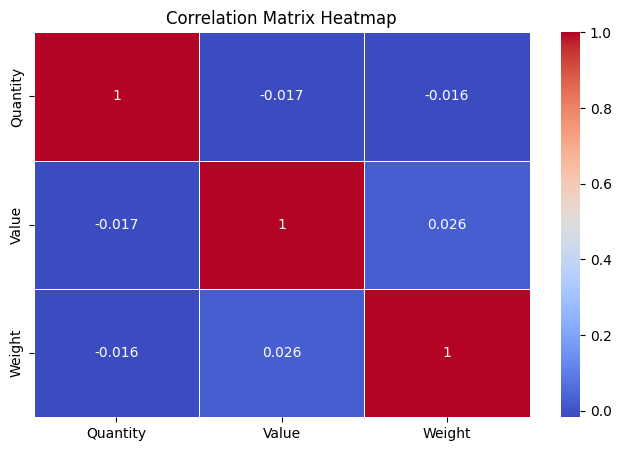

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Conclusion: Correlation Matrix Heatmap Analysis**
The heatmap visually represents the correlation between Quantity, Value, and Weight.
 The color intensity and numeric values confirm the following:

1.**Quantity vs. Value (-0.017):**

A very weak negative correlation, indicating no meaningful linear relationship between the quantity of goods and their value.

2.**Quantity vs. Weight (-0.016):**

A similarly weak negative correlation suggests that the number of items does not significantly impact their weight.

3.**Value vs. Weight (0.026):**

A negligible positive correlation shows almost no linear relationship between the monetary value of goods and their weight.

4.**Perfect Self-Correlation (Diagonal):**

The diagonal elements show a perfect correlation of 1.0, as expected.

**Managerial Recommendations:**

1.**Segment the Data**:

The near-zero correlations suggest the absence of strong linear relationships in the overall dataset. Segment the data by product type, region, or time period to uncover more nuanced insights.

2.**Independent Optimization:**

Since these metrics operate independently, treat them as separate entities when developing strategies:

Quantity: Focus on demand forecasting and inventory management.

Value: Optimize pricing models and sales strategies.

Weight: Streamline logistics to reduce costs, particularly for heavier goods.

3.**Advanced Analytics**:

Explore non-linear relationships or conduct multivariate analysis to identify hidden patterns or dependencies that this simple correlation analysis may not reveal.

4.**Prioritize Operational Efficiency:**

With no strong dependencies between these variables, focus on improving efficiency across all dimensions independently:
Reduce shipping costs by optimizing for weight.
Maximize revenue by targeting high-value goods.
Ensure smooth inventory flow to balance quantity.

5.**Regular Monitoring:**

Correlations might vary over time or across specific categories. Regularly monitor these metrics and adjust strategies accordingly.

In [ ]:
# Categorical Data

def as59_categorical_summary(df, cat_cols):
    summary = {}
    for col in cat_cols:
        if col in df.columns:
            summary[col] = {
                'Count': df[col].count(),
                'Minimum': df[col].min(),
                'Maximum': df[col].max(),
                'Mode': df[col].mode().iloc[0],
            }
    return summary

as59_categorical_summaries = as59_categorical_summary(as59_sample, as59_cat_vars)

for col, stats in as59_categorical_summaries.items():
    print(f"Summary for {col}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value}")
    print("-" * 20)  # separator

Summary for Country:
  Count: 5001
  Minimum: 0.0
  Maximum: 242.0
  Mode: 49.0
--------------------
Summary for Product:
  Count: 5001
  Minimum: 0.0
  Maximum: 966.0
  Mode: 307.0
--------------------
Summary for Import_Export:
  Count: 5001
  Minimum: 0.0
  Maximum: 1.0
  Mode: 1.0
--------------------
Summary for Category:
  Count: 5001
  Minimum: 0.0
  Maximum: 4.0
  Mode: 2.0
--------------------
Summary for Port:
  Count: 5001
  Minimum: 0.0
  Maximum: 4310.0
  Mode: 1649.0
--------------------
Summary for Shipping_Method:
  Count: 5001
  Minimum: 0.0
  Maximum: 2.0
  Mode: 1.0
--------------------
Summary for Supplier:
  Count: 5001
  Minimum: 0.0
  Maximum: 4558.0
  Mode: 1980.0
--------------------
Summary for Customer:
  Count: 5001
  Minimum: 0.0
  Maximum: 4850.0
  Mode: 1961.0
--------------------
Summary for Customs_Code:
  Count: 5001
  Minimum: 0.0
  Maximum: 4988.0
  Mode: 749.0
--------------------
Summary for Payment_Terms:
  Count: 5001
  Minimum: 0.0
  Maximum: 3.

**Key Observations:**

**Country:**

Count: 5001 (total entries)

Range: 0.0 (minimum) to 242.0 (maximum)

Mode: 49.0 (the most frequently occurring value)

Indicates that there is one dominant country contributing to the dataset, potentially highlighting trade concentration in a specific region.

**Product**:

Range: 0.0 to 966.0; Mode: 307.0

Suggests a wide variety of products, but certain products (e.g., 307) dominate the trade.

**Import_Export**:

Range: 0.0 (import) to 1.0 (export); Mode: 1.0

Indicates export activities are predominant in the dataset.

**Category:**

Range: 0.0 to 4.0; Mode: 2.0

A balanced representation of categories, but Category 2 is the most common.

**Port:**

Range: 0.0 to 4310.0; Mode: 1649.0

Suggests that certain ports (e.g., Port 1649) are heavily used, potentially a logistical hub.

**Shipping_Method:**

Range: 0.0 to 2.0; Mode: 1.0

Shipping Method 1 (likely the most efficient or cost-effective method) is dominant.

**Supplier and Customer:**

Wide ranges (0.0 to 4558 for Supplier; 0.0 to 4850 for Customer) with specific dominant values (Supplier: 1980, Customer: 1961).

Indicates trade concentration with certain key suppliers and customers.

**Customs_Code**:

Range: 0.0 to 4988.0; Mode: 749.0

A few customs codes dominate, possibly reflecting specific product types or trade regulations.

**Payment_Terms:**

Range: 0.0 to 3.0; Mode: 0.0

Payment Term 0 is the most common, possibly indicating a preferred or default payment structure.

**Managerial Recommendations:**

**Address Trade Concentration:**

The dataset indicates high dependency on specific countries (Mode 49), products (Mode 307), suppliers (1980), and customers (1961). Diversify trade to reduce dependency risks and explore new markets to mitigate potential disruptions.

**Optimize Export Operations:**

Since exports (Mode 1.0) dominate, focus on improving export processes, such as faster customs clearance, reduced shipping delays, and competitive pricing strategies for global markets.

**Focus on Key Ports:**

Ports like 1649 seem central to trade operations. Invest in infrastructure or partnerships at these ports to improve logistics efficiency and reduce costs.

**Streamline Shipping Methods:**

The dominance of Shipping Method 1 suggests its efficiency or popularity. Investigate its performance to reinforce strengths and explore alternative methods for specific routes or scenarios.

**Evaluate Product Mix:**

While some products dominate, review their profitability and market demand. Identify underperforming products and focus on high-demand, high-margin products.

**Tailor Payment Terms:**

Since Payment Term 0 is most common, analyze its impact on cash flow and customer satisfaction. Offer flexible terms to attract more customers while maintaining financial stability.

**Simplify Customs Processes:**

The prevalence of specific customs codes (Mode 749) suggests that trade may be concentrated in certain categories. Streamline customs procedures for these codes to improve operational efficiency.

**Leverage Data Insights for Planning:**

Use the mode values as benchmarks to allocate resources efficiently.
 For example:
Increase inventory for Mode 307 products.

Prioritize shipping routes involving Mode 1649 ports.

**Monitor and Adapt**:

Regularly review trends in dominant variables to adapt strategies. For instance, if a new country or product starts showing growth, allocate resources to capitalize on emerging opportunities.



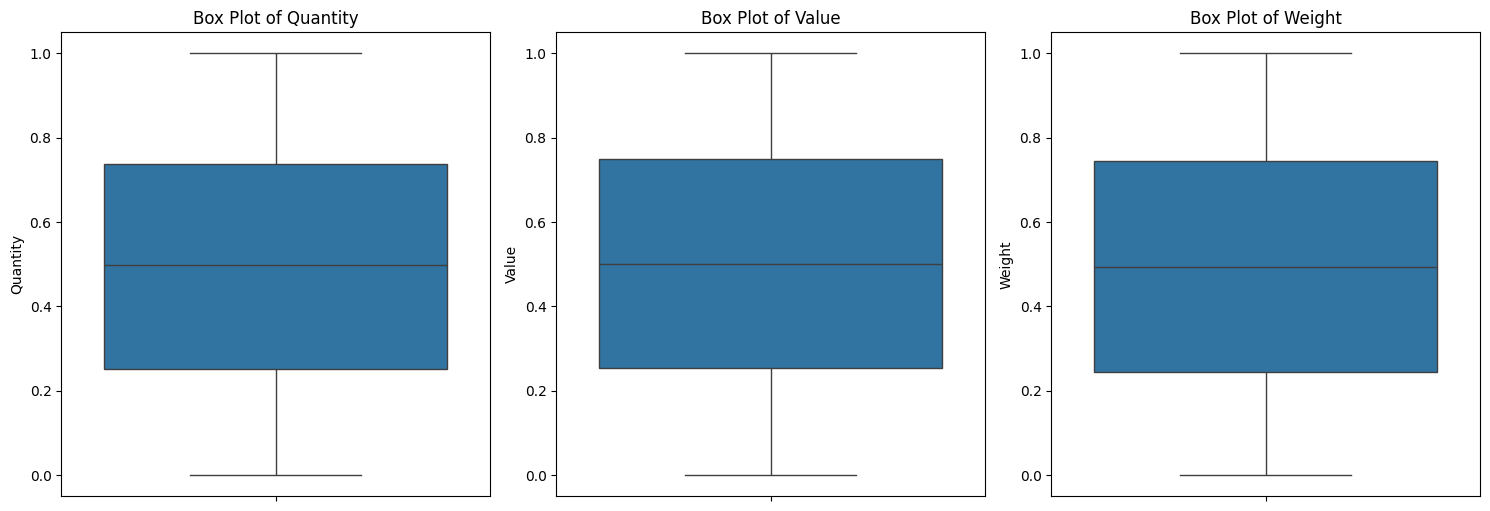

In [ ]:
# Box plots for non-categorical variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(as59_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=as59_sample[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

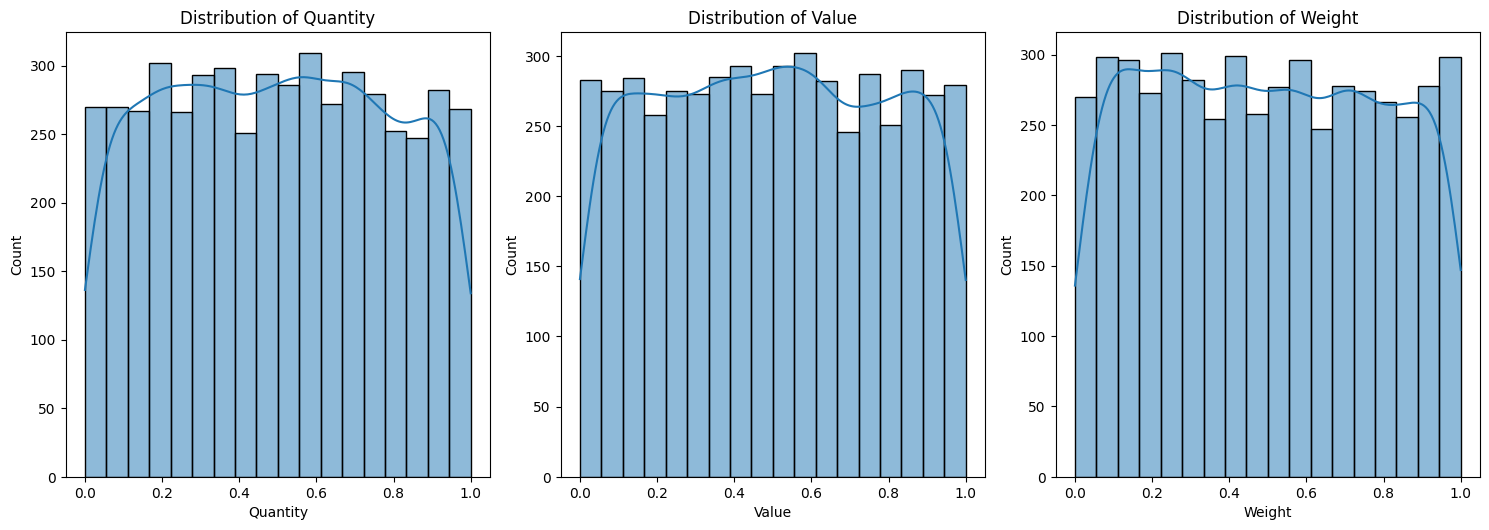

In [ ]:
# Histograms with KDE for distribution visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(as59_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(as59_sample[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

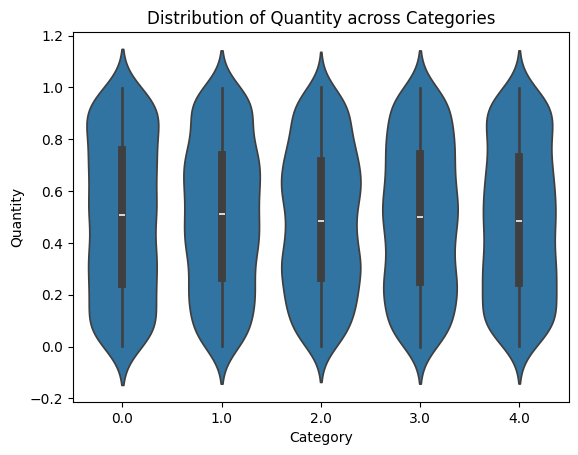

In [ ]:
# Violin Plot

sns.violinplot(x='Category', y='Quantity', data=as59_sample)
plt.title('Distribution of Quantity across Categories')
plt.show()


In [ ]:
# Test of Homogeneity {Chi-sq} on categorical data

as59_contingency_table = pd.crosstab(as59_sample['Import_Export'], as59_sample['Category'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(as59_contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
as59_alpha = 0.05  # Significance level

if p < as59_alpha:
    print("Reject the null hypothesis: There is a significant association between the two categorical variables.")
else:
    print("There is no significant association between the two categorical variables.")


Chi-square statistic: 1.7610944951758778
P-value: 0.7795921162467261
Degrees of freedom: 4
Expected frequencies:
[[481.35872825 491.23275345 511.96820636 491.23275345 493.20755849]
 [493.64127175 503.76724655 525.03179364 503.76724655 505.79244151]]
There is no significant association between the two categorical variables.


In [ ]:
# Test of Normality {Shapiro-Wilk | Kolmogorov-Smirnov | Anderson-Darling | Jarque-Bera

def normality_tests(data):

    as59_results = {}

    # Shapiro-Wilk test
    shapiro_statistic, shapiro_pvalue = shapiro(data)
    as59_results["Shapiro-Wilk"] = {"statistic": shapiro_statistic, "p-value": shapiro_pvalue}

    # Kolmogorov-Smirnov test (against a normal distribution)
    ks_statistic, ks_pvalue = kstest(data, 'norm')
    as59_results["Kolmogorov-Smirnov"] = {"statistic": ks_statistic, "p-value": ks_pvalue}

    # Anderson-Darling test
    anderson_result = anderson(data)
    as59_results["Anderson-Darling"] = {
        "statistic": anderson_result.statistic,
        "critical_values": anderson_result.critical_values,
        "significance_level": anderson_result.significance_level
    }

    # Jarque-Bera test
    jb_statistic, jb_pvalue = jarque_bera(data)
    as59_results["Jarque-Bera"] = {"statistic": jb_statistic, "p-value": jb_pvalue}

    return as59_results


In [ ]:
from scipy import stats

# Test of Correlation (T-test)
def t_test_correlation(data1, data2):
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    return {"t-statistic": t_statistic, "p-value": p_value}

for col in as59_non_cat_vars:
    print(f"Normality tests for {col}:")
    normality_test_results = normality_tests(as59_sample[col])
    for test_name, result in normality_test_results.items():
        print(f"  {test_name}: {result}")

    # Example of T-test
    if len(as59_non_cat_vars) > 1:
        for i in range(len(as59_non_cat_vars)):
            for j in range(i+1, len(as59_non_cat_vars)):
                col1, col2 = as59_non_cat_vars[i], as59_non_cat_vars[j]
                t_test_result = t_test_correlation(as59_sample[col1], as59_sample[col2])
                print(f"T-test Correlation between {col1} and {col2}: {t_test_result}")
    print()
    print('*'*20)
    print()

Normality tests for Quantity:
  Shapiro-Wilk: {'statistic': 0.9581299218598986, 'p-value': 1.0839639544171774e-35}
  Kolmogorov-Smirnov: {'statistic': 0.5, 'p-value': 0.0}
  Anderson-Darling: {'statistic': 49.88884835239878, 'critical_values': array([0.576, 0.655, 0.786, 0.917, 1.091]), 'significance_level': array([15. , 10. ,  5. ,  2.5,  1. ])}
  Jarque-Bera: {'statistic': 284.1729134729748, 'p-value': 1.961714879335596e-62}
T-test Correlation between Quantity and Value: {'t-statistic': -0.37498096445987744, 'p-value': 0.7076825758326817}
T-test Correlation between Quantity and Weight: {'t-statistic': 0.11572857589077874, 'p-value': 0.9078699818524005}
T-test Correlation between Value and Weight: {'t-statistic': 0.4872214377667224, 'p-value': 0.6261120944154601}

********************

Normality tests for Value:
  Shapiro-Wilk: {'statistic': 0.9561075564224494, 'p-value': 2.291366073535665e-36}
  Kolmogorov-Smirnov: {'statistic': 0.5001221378056623, 'p-value': 0.0}
  Anderson-Darling:

In [ ]:
as59_X = as59_processed[['Quantity','Weight']]  # Features (excluding 'Cluster')
as59_y = as59_processed[['Shipping_Method']]  # Target variable

as59_X_train, as59_X_test, as59_y_train, as59_y_test = train_test_split(as59_X, as59_y, test_size=0.3, random_state=55024)

# Print the shapes of the resulting datasets
print("X_train shape:", as59_X_train.shape)
print("X_test shape:", as59_X_test.shape)
print("y_train shape:", as59_y_train.shape)
print("y_test shape:", as59_y_test.shape)


X_train shape: (3500, 2)
X_test shape: (1501, 2)
y_train shape: (3500, 1)
y_test shape: (1501, 1)


In [ ]:
# Initialize the Decision Tree Classifier
as59_dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=55024)

# Train the model
as59_dt_classifier.fit(as59_X_train, as59_y_train)

# Make predictions on the test set
as59_y_pred_dt = as59_dt_classifier.predict(as59_X_test)

In [ ]:
# Evaluate the model
as59_accuracy_dt = accuracy_score(as59_y_test, as59_y_pred_dt)
print(f"Decision Tree Accuracy: {as59_accuracy_dt}")
print(classification_report(as59_y_test, as59_y_pred_dt))

Decision Tree Accuracy: 0.3144570286475683
              precision    recall  f1-score   support

         0.0       0.30      0.29      0.30       515
         1.0       0.33      0.36      0.34       498
         2.0       0.31      0.30      0.31       488

    accuracy                           0.31      1501
   macro avg       0.31      0.31      0.31      1501
weighted avg       0.31      0.31      0.31      1501



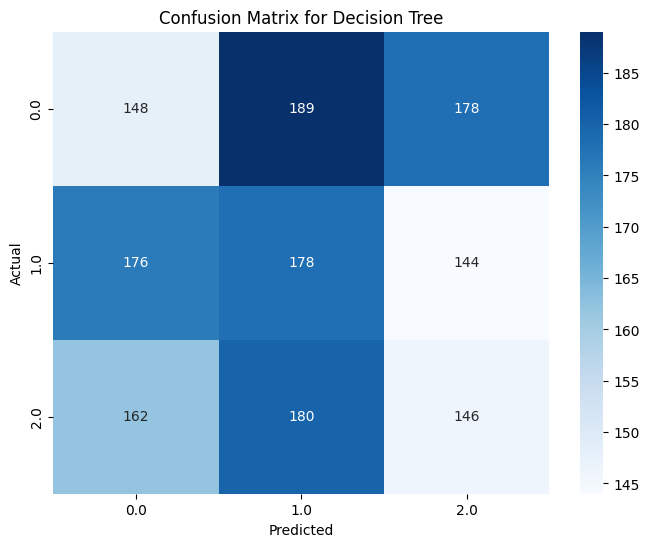

In [ ]:
# Confusion matrix

as59_cm = confusion_matrix(as59_y_test, as59_y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(as59_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=as59_dt_classifier.classes_, yticklabels=as59_dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2. Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(as59_X_train, as59_y_train)

# 3. Make predictions on the test set
y_pred = knn.predict(as59_X_test)

# 4. Evaluate the model
as59_accuracy_knn = accuracy_score(as59_y_test, y_pred)
print(f"Accuracy: {as59_accuracy_knn}")
print(classification_report(as59_y_test, y_pred))

Accuracy: 0.34110592938041306
              precision    recall  f1-score   support

         0.0       0.36      0.48      0.41       515
         1.0       0.33      0.35      0.34       498
         2.0       0.31      0.19      0.23       488

    accuracy                           0.34      1501
   macro avg       0.33      0.34      0.33      1501
weighted avg       0.34      0.34      0.33      1501



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Or MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 2. Create and train the Naive Bayes classifier
nb = GaussianNB()  # Choose the appropriate NB type (GaussianNB, MultinomialNB, BernoulliNB)
nb.fit(as59_X_train, as59_y_train)

# 3. Make predictions on the test set
as59_y_pred = nb.predict(as59_X_test)

# 4. Evaluate the model
as59_accuracy_nb = accuracy_score(as59_y_test, as59_y_pred)
print(f"Accuracy: {as59_accuracy_nb}")
print(classification_report(as59_y_test, as59_y_pred))

Accuracy: 0.32978014656895405
              precision    recall  f1-score   support

         0.0       0.31      0.04      0.07       515
         1.0       0.33      0.67      0.44       498
         2.0       0.33      0.29      0.31       488

    accuracy                           0.33      1501
   macro avg       0.32      0.33      0.27      1501
weighted avg       0.32      0.33      0.27      1501



In [ ]:
# Initialize the Logistic Regression model
as59_logreg_classifier = LogisticRegression(random_state=55024)

# Train the model
as59_logreg_classifier.fit(as59_X_train, as59_y_train)

# Make predictions on the test set
as59_y_pred_logreg = as59_logreg_classifier.predict(as59_X_test)

# Evaluate the model
as59_accuracy_logreg = accuracy_score(as59_y_test, as59_y_pred_logreg)
print(f"Logistic Regression Accuracy: {as59_accuracy_logreg}")
print(classification_report(as59_y_test, as59_y_pred_logreg))

Logistic Regression Accuracy: 0.34710193204530315
              precision    recall  f1-score   support

         0.0       0.42      0.13      0.19       515
         1.0       0.33      0.59      0.43       498
         2.0       0.35      0.33      0.34       488

    accuracy                           0.35      1501
   macro avg       0.37      0.35      0.32      1501
weighted avg       0.37      0.35      0.32      1501



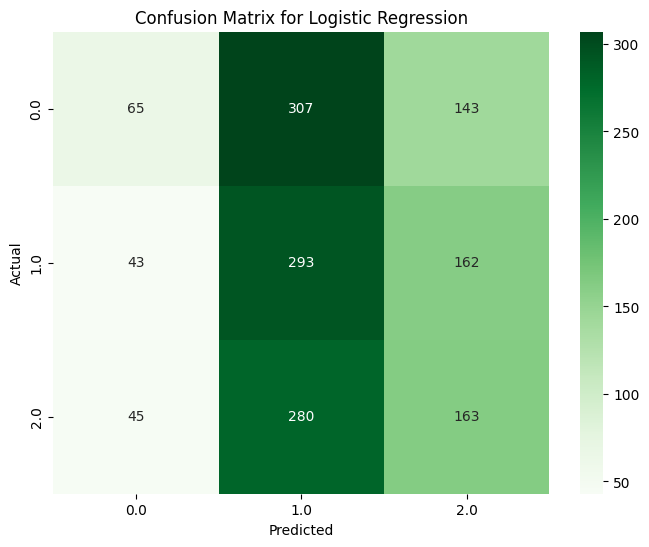

In [ ]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(as59_y_test, as59_y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens',  # Different colormap
            xticklabels=as59_logreg_classifier.classes_, yticklabels=as59_logreg_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
# Initialize the Logistic Regression model
as59_logreg_classifier = LogisticRegression(random_state=55024)

# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=55024)

# Perform Cross-Validation
cv_accuracy = cross_val_score(as59_logreg_classifier, as59_X_train, as59_y_train, cv=kfold, scoring='accuracy')

# Output Cross-Validation results
print("K-Fold Cross-Validation Accuracy Scores: ", cv_accuracy)
print("Mean Accuracy: ", cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", cv_accuracy.std())

# Train the model on the entire training set (if needed for later use)
as59_logreg_classifier.fit(as59_X_train, as59_y_train)

# Evaluate the model on the test set
as59_y_pred_logreg = as59_logreg_classifier.predict(as59_X_test)
as59_accuracy_logreg = accuracy_score(as59_y_test, as59_y_pred_logreg)
print(f"Logistic Regression Test Set Accuracy: {as59_accuracy_logreg}")
print(classification_report(as59_y_test, as59_y_pred_logreg))

K-Fold Cross-Validation Accuracy Scores:  [0.34571429 0.30857143 0.37142857 0.34       0.34142857]
Mean Accuracy:  0.34142857142857147
Standard Deviation of Accuracy:  0.020000000000000007
Logistic Regression Test Set Accuracy: 0.34710193204530315
              precision    recall  f1-score   support

         0.0       0.42      0.13      0.19       515
         1.0       0.33      0.59      0.43       498
         2.0       0.35      0.33      0.34       488

    accuracy                           0.35      1501
   macro avg       0.37      0.35      0.32      1501
weighted avg       0.37      0.35      0.32      1501



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
as59_svm_classifier = SVC(kernel='linear', random_state=55024)

# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=55024)

# Perform Cross-Validation
cv_accuracy = cross_val_score(as59_svm_classifier, as59_X_train, as59_y_train, cv=kfold, scoring='accuracy')

# Output Cross-Validation results
print("K-Fold Cross-Validation Accuracy Scores: ", cv_accuracy)
print("Mean Accuracy: ", cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", cv_accuracy.std())

# Train the model on the entire training set (if needed for later use)
as59_svm_classifier.fit(as59_X_train, as59_y_train)

# Evaluate the model on the test set
as59_y_pred_svm = as59_svm_classifier.predict(as59_X_test)
as59_accuracy_svm = accuracy_score(as59_y_test, as59_y_pred_svm)
print(f"SVM Test Set Accuracy: {as59_accuracy_svm}")
print(classification_report(as59_y_test, as59_y_pred_svm))

K-Fold Cross-Validation Accuracy Scores:  [0.35428571 0.31142857 0.34       0.34428571 0.31857143]
Mean Accuracy:  0.33371428571428574
Standard Deviation of Accuracy:  0.01612704661905152
SVM Test Set Accuracy: 0.34177215189873417
              precision    recall  f1-score   support

         0.0       0.38      0.24      0.29       515
         1.0       0.33      0.51      0.40       498
         2.0       0.33      0.28      0.30       488

    accuracy                           0.34      1501
   macro avg       0.35      0.34      0.33      1501
weighted avg       0.35      0.34      0.33      1501



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

# 1. Initialize the SGD Classifier
as59_sgd_classifier = SGDClassifier(loss='log_loss', random_state=5045, max_iter=1000, tol=1e-3)
# Changed 'log' to 'log_loss' for logistic regression

# 2. Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=55024)

# 3. Perform Cross-Validation
cv_accuracy = cross_val_score(as59_sgd_classifier, as59_X_train, as59_y_train, cv=kfold, scoring='accuracy')

# 4. Output Cross-Validation Results
print("K-Fold Cross-Validation Accuracy Scores: ", cv_accuracy)
print("Mean Accuracy: ", cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", cv_accuracy.std())

# 5. Train the SGD Classifier on the entire training set
as59_sgd_classifier.fit(as59_X_train, as59_y_train)

# 6. Make predictions on the test set
as59_y_pred_sgd = as59_sgd_classifier.predict(as59_X_test)

# 7. Evaluate the Model
as59_accuracy_sgd = accuracy_score(as59_y_test, as59_y_pred_sgd)
print(f"SGD Test Set Accuracy: {as59_accuracy_sgd}")
print(classification_report(as59_y_test, as59_y_pred_sgd))

K-Fold Cross-Validation Accuracy Scores:  [0.38714286 0.32142857 0.33285714 0.32571429 0.33428571]
Mean Accuracy:  0.34028571428571425
Standard Deviation of Accuracy:  0.023894325173777212
SGD Test Set Accuracy: 0.3251165889407062
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       515
         1.0       0.00      0.00      0.00       498
         2.0       0.33      1.00      0.49       488

    accuracy                           0.33      1501
   macro avg       0.11      0.33      0.16      1501
weighted avg       0.11      0.33      0.16      1501



In [ ]:
print(f"Logistic Regression Accuracy: {as59_accuracy_logreg}")
print(f"SVM Accuracy: {as59_accuracy_svm}")

if as59_accuracy_logreg > as59_accuracy_svm:
    print("Logistic Regression model performs better.")
elif as59_accuracy_svm > as59_accuracy_logreg:
    print("Support Vector Machine model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.34710193204530315
SVM Accuracy: 0.34177215189873417
Logistic Regression model performs better.


In [ ]:
print(f"Logistic Regression Accuracy: {as59_accuracy_logreg}")
print(f"SGD Accuracy: {as59_accuracy_sgd}")

if as59_accuracy_logreg > as59_accuracy_sgd:
    print("Logistic Regression model performs better.")
elif as59_accuracy_sgd > as59_accuracy_logreg:
    print("Stochastic Gradient Descent model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.34710193204530315
SGD Accuracy: 0.3251165889407062
Logistic Regression model performs better.


In [ ]:
print(f"Decision Tree Accuracy: {as59_accuracy_dt}")
print(f"KNN Accuracy: {as59_accuracy_knn}")

if as59_accuracy_dt > as59_accuracy_knn:
    print("Decision Tree model performs better.")
elif as59_accuracy_knn > as59_accuracy_dt:
    print("K Nearest Neighbour model performs better.")
else:
    print("Both models perform equally.")


Decision Tree Accuracy: 0.3144570286475683
KNN Accuracy: 0.34110592938041306
K Nearest Neighbour model performs better.


In [ ]:
print(f"Logistic Regression Accuracy: {as59_accuracy_logreg}")
print(f"Decision Tree Accuracy: {as59_accuracy_dt}")

if as59_accuracy_logreg > as59_accuracy_dt:
    print("Logistic Regression model performs better.")
elif as59_accuracy_dt > as59_accuracy_logreg:
    print("Decision Tree model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.34710193204530315
Decision Tree Accuracy: 0.3144570286475683
Logistic Regression model performs better.


In [ ]:
print(f"Decision Tree Accuracy: {as59_accuracy_dt}")
print(f"Naive Bayes Accuracy: {as59_accuracy_nb}")

if as59_accuracy_dt > as59_accuracy_nb:
    print("Decision Tree model performs better.")
elif as59_accuracy_nb > as59_accuracy_dt:
    print("Naive Bayes model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.3144570286475683
Naive Bayes Accuracy: 0.32978014656895405
Naive Bayes model performs better.


In [ ]:
# Initialize the Random Forest Classifier
as59_rf_classifier = RandomForestClassifier(random_state=5024)

# Train the model
as59_rf_classifier.fit(as59_X_train, as59_y_train)

# Make predictions on the test set
as59_y_pred_rf = as59_rf_classifier.predict(as59_X_test)

# Evaluate the model
as59_accuracy_rf = accuracy_score(as59_y_test, as59_y_pred_rf)
print(f"Random Forest Accuracy: {as59_accuracy_rf}")
print(classification_report(as59_y_test, as59_y_pred_rf))

Random Forest Accuracy: 0.3284477015323118
              precision    recall  f1-score   support

         0.0       0.34      0.32      0.33       515
         1.0       0.33      0.36      0.34       498
         2.0       0.32      0.30      0.31       488

    accuracy                           0.33      1501
   macro avg       0.33      0.33      0.33      1501
weighted avg       0.33      0.33      0.33      1501



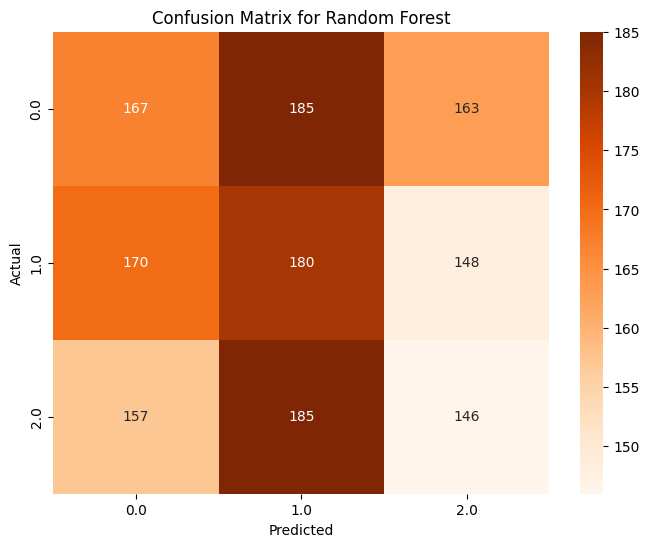

In [ ]:
# Confusion Matrix for Random Forest
as59_cm_rf = confusion_matrix(as59_y_test, as59_y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(as59_cm_rf, annot=True, fmt='d', cmap='Oranges',  # Different colormap
            xticklabels=as59_rf_classifier.classes_, yticklabels=as59_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
as59_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(as59_X_train, as59_y_train)
print("The mean accuracy on the given test data and labels from Extreme Gradient Boosting is",as59_clf.score(as59_X_test, as59_y_test))


The mean accuracy on the given test data and labels from Extreme Gradient Boosting is 0.31778814123917387


In [ ]:
# Compare Random Forest and Decision Tree

print(f"\nDecision Tree Accuracy: {as59_accuracy_dt}")
print(f"Random Forest Accuracy: {as59_accuracy_rf}")

if as59_accuracy_rf > as59_accuracy_dt:
    print("Random Forest performs better than Decision Tree.")
elif as59_accuracy_dt > as59_accuracy_rf:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both models perform equally.")



Decision Tree Accuracy: 0.3144570286475683
Random Forest Accuracy: 0.3284477015323118
Random Forest performs better than Decision Tree.


In [ ]:
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def time_model_run(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    return end_time - start_time

# Logistic Regression
log_reg_model = LogisticRegression(random_state=55024)
log_reg_time = time_model_run(log_reg_model, as59_X_train, as59_y_train)
print(f"Logistic Regression runtime: {log_reg_time:.4f} seconds")

# Support Vector Machine (SVM)
svm_model = SVC(random_state=55024)
svm_time = time_model_run(svm_model, as59_X_train, as59_y_train)
print(f"SVM runtime: {svm_time:.4f} seconds")

# Stochastic Gradient Descent (SGD)
sgd_model = SGDClassifier(random_state=55024)
sgd_time = time_model_run(sgd_model, as59_X_train, as59_y_train)
print(f"SGD runtime: {sgd_time:.4f} seconds")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=55024)
dt_time = time_model_run(dt_model, as59_X_train, as59_y_train)
print(f"Decision Tree runtime: {dt_time:.4f} seconds")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_time = time_model_run(knn_model, as59_X_train, as59_y_train)
print(f"KNN runtime: {knn_time:.4f} seconds")

# Naive Bayes
nb_model = GaussianNB()
nb_time = time_model_run(nb_model, as59_X_train, as59_y_train)
print(f"Naive Bayes runtime: {nb_time:.4f} seconds")

# Random Forest
rf_model = RandomForestClassifier(random_state=55024)
rf_time = time_model_run(rf_model, as59_X_train, as59_y_train)
print(f"Random Forest runtime: {rf_time:.4f} seconds")

# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=55024)
xgb_time = time_model_run(xgb_model, as59_X_train, as59_y_train)
print(f"XGBoost runtime: {xgb_time:.4f} seconds")

Logistic Regression runtime: 0.0105 seconds
SVM runtime: 0.5302 seconds
SGD runtime: 0.0319 seconds
Decision Tree runtime: 0.0375 seconds
KNN runtime: 0.0053 seconds
Naive Bayes runtime: 0.0043 seconds
Random Forest runtime: 1.0736 seconds
XGBoost runtime: 0.3081 seconds


In [ ]:
import tracemalloc
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def get_model_memory_usage(model, X, y):
    tracemalloc.start()
    model.fit(X, y)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / (1024 * 1024)  # Convert bytes to MB

# Logistic Regression
log_reg_model = LogisticRegression(random_state=55024)
log_reg_memory = get_model_memory_usage(log_reg_model, as59_X_train, as59_y_train)
print(f"Logistic Regression memory usage: {log_reg_memory:.2f} MB")

# Support Vector Machine (SVM)
svm_model = SVC(random_state=55024)
svm_memory = get_model_memory_usage(svm_model, as59_X_train, as59_y_train)
print(f"SVM memory usage: {svm_memory:.2f} MB")

# Stochastic Gradient Descent (SGD)
sgd_model = SGDClassifier(random_state=55024)
sgd_memory = get_model_memory_usage(sgd_model, as59_X_train, as59_y_train)
print(f"SGD memory usage: {sgd_memory:.2f} MB")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=55024)
dt_memory = get_model_memory_usage(dt_model, as59_X_train, as59_y_train)
print(f"Decision Tree memory usage: {dt_memory:.2f} MB")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_memory = get_model_memory_usage(knn_model, as59_X_train, as59_y_train)
print(f"KNN memory usage: {knn_memory:.2f} MB")

# Naive Bayes
nb_model = GaussianNB()
nb_memory = get_model_memory_usage(nb_model, as59_X_train, as59_y_train)
print(f"Naive Bayes memory usage: {nb_memory:.2f} MB")

# Random Forest
rf_model = RandomForestClassifier(random_state=55024)
rf_memory = get_model_memory_usage(rf_model, as59_X_train, as59_y_train)
print(f"Random Forest memory usage: {rf_memory:.2f} MB")

# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=55024)
xgb_memory = get_model_memory_usage(xgb_model, as59_X_train, as59_y_train)
print(f"XGBoost memory usage: {xgb_memory:.2f} MB")

Logistic Regression memory usage: 0.34 MB
SVM memory usage: 0.25 MB
SGD memory usage: 0.17 MB
Decision Tree memory usage: 0.23 MB
KNN memory usage: 0.22 MB
Naive Bayes memory usage: 0.11 MB
Random Forest memory usage: 0.46 MB
XGBoost memory usage: 0.88 MB
